# Used Car Price Prediction Using Machine Learning

In this project we will be working with used car data in order to generate machine learning models that will be able to predict the price of a used car based on featrues such as make, model, mileage, where the car is located, as well as multiple other features that impact the value of the car. We will also determine which features have the most relevance on a used car's value.

With rapid changes occuring in the auto industry, it is important for both dealerships and potential buyers to get fair estimates when determining the value of used cars. Every year, more electric vehicles are purchased, new auto manufacturers are making a name for themselves, and government regulation is affecting the cost to own different types of vehicles. With these factors considered, there has been a lot of volatility in the auto industry over the last 5 years.

We plan on creating four machine learning models that can potentially predict the price of a used car given the features that are in the dataset

This information could be leveraged by both dealerships and buyers to get an idea of what a car is worth before either buying or selling it

# Data Collection:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("car_data.csv")

print("Preview of the data:")
print(df.head())

# summary statistics
print("\nSummary statistics:")
print(df.describe())

Preview of the data:
   Unnamed: 0      car_brand      car_model  car_price   car_city  car_fuel  \
0           0           Ford      Focus         550000  Astrakhan  gasoline   
1           1  Mercedes-Benz  GLA-Class        1820000  Astrakhan  gasoline   
2           2          Haval         F7        2600000  Astrakhan  gasoline   
3           3         Toyota      Camry        4200000  Astrakhan  gasoline   
4           4          OMODA         C5        2125000  Astrakhan  gasoline   

  car_transmission car_drive  car_mileage car_country  car_engine_capacity  \
0           manual       FWD       300000         USA                  1.8   
1            robot       FWD        88000          DE                  1.6   
2            robot       4WD        19000          CN                  1.5   
3        automatic       FWD        30000          JP                  3.5   
4              CVT       FWD        18824          CN                  1.5   

   car_engine_hp  car_age  
0      

In [22]:
import pandas as pd


df = pd.read_csv("car_data.csv")

# delete the unnamed column
df = df.drop(columns=['Unnamed: 0'])

# convert price column from rubles to USD (conversion rate: 0.011)
df['car_price'] = df['car_price'] * 0.011

print(df.head())

       car_brand      car_model  car_price   car_city  car_fuel  \
0           Ford      Focus         6050.0  Astrakhan  gasoline   
1  Mercedes-Benz  GLA-Class        20020.0  Astrakhan  gasoline   
2          Haval         F7        28600.0  Astrakhan  gasoline   
3         Toyota      Camry        46200.0  Astrakhan  gasoline   
4          OMODA         C5        23375.0  Astrakhan  gasoline   

  car_transmission car_drive  car_mileage car_country  car_engine_capacity  \
0           manual       FWD       300000         USA                  1.8   
1            robot       FWD        88000          DE                  1.6   
2            robot       4WD        19000          CN                  1.5   
3        automatic       FWD        30000          JP                  3.5   
4              CVT       FWD        18824          CN                  1.5   

   car_engine_hp  car_age  
0            125       14  
1            156       10  
2            150        2  
3            249

In [23]:
df.isnull().sum()

car_brand              0
car_model              0
car_price              0
car_city               0
car_fuel               0
car_transmission       0
car_drive              0
car_mileage            0
car_country            0
car_engine_capacity    0
car_engine_hp          0
car_age                0
dtype: int64

In [24]:
categorical_columns = ['car_brand', 'car_model', 'car_city', 'car_fuel', 'car_transmission', 'car_drive', 'car_country']

# iterate over each categorical column and print unique value counts
for column in categorical_columns:
    print(f"Unique counts for '{column}':")
    print(df[column].value_counts())
    print()

Unique counts for 'car_brand':
Toyota     8293
Lada       3925
Kia        3184
Nissan     3093
Hyundai    2787
           ... 
Hawtai        1
Maybach       1
Roewe         1
Skywell       1
Tianma        1
Name: car_brand, Length: 112, dtype: int64

Unique counts for 'car_model':
Solaris         1010
Rio              874
Camry            801
Granta           704
Polo             585
                ... 
Shine Max          1
Arrizo 7           1
Granada            1
B-MAX              1
Be-Go              1
Name: car_model, Length: 1380, dtype: int64

Unique counts for 'car_city':
Krasnoyarsk         1987
Surgut              1984
Barnaul             1967
Novosibirsk         1952
Tomsk               1943
Voronezh            1935
Chita               1935
Yekaterinburg       1924
Blagoveshchensk     1921
Khabarovsk          1892
Omsk                1886
Krasnodar           1863
Yakutsk             1861
Rostov-on-Don       1817
Chelyabinsk         1791
Samara              1787
Irkutsk     

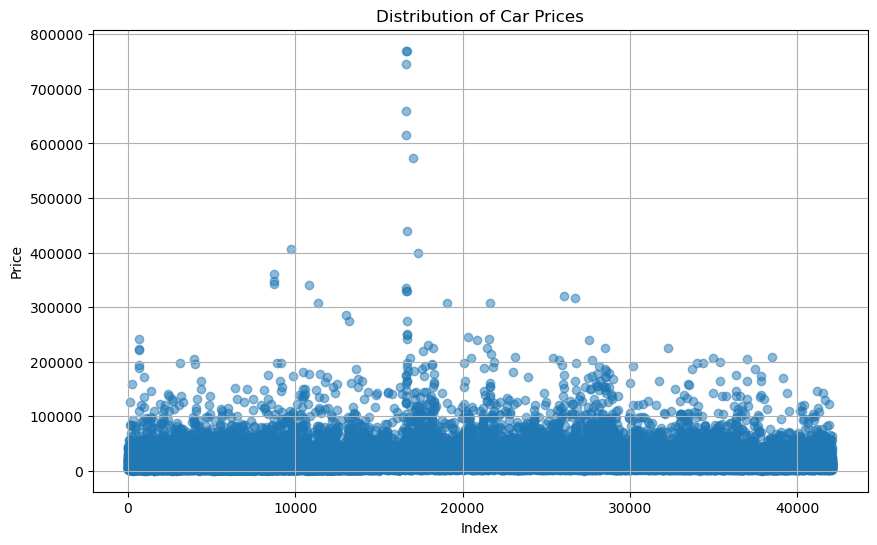

In [25]:
# scatter plot of car prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['car_price'], alpha=0.5)
plt.title('Distribution of Car Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()

shows how the majority of the cars fall into the cheap to moderate price range but there are some potential outliers that are much more expensive.

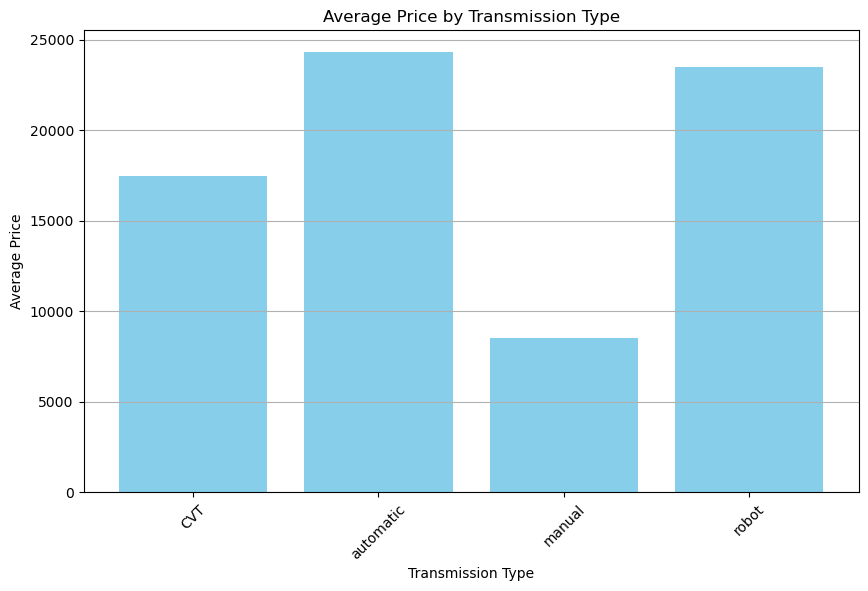

In [26]:
# calculate average price for each type of transmission
avg_price_by_transmission = df.groupby('car_transmission')['car_price'].mean().reset_index()

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_transmission['car_transmission'], avg_price_by_transmission['car_price'], color='skyblue')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


This shows that transmission type is a potential feature because of how it can directly impact price

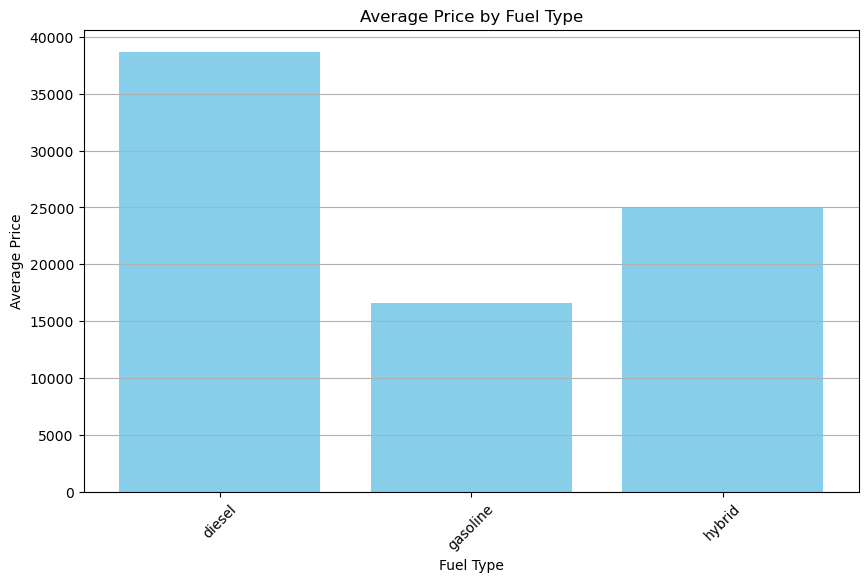

In [27]:
#calculate each price for each type of fuel
avg_price_by_fuel = df.groupby('car_fuel')['car_price'].mean().reset_index()

#bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_fuel['car_fuel'], avg_price_by_fuel['car_price'], color='skyblue')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

This shows that fuel type may also be correlated to the cars price

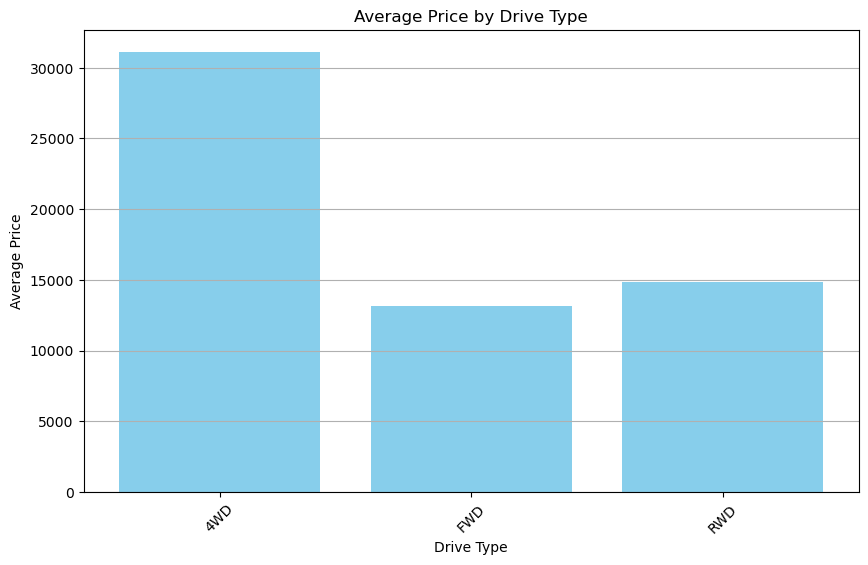

In [28]:
# calculate each price for drive type
avg_price_by_drive = df.groupby('car_drive')['car_price'].mean().reset_index()

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_drive['car_drive'], avg_price_by_drive['car_price'], color='skyblue')
plt.title('Average Price by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

This shows that drive type does influence car price.

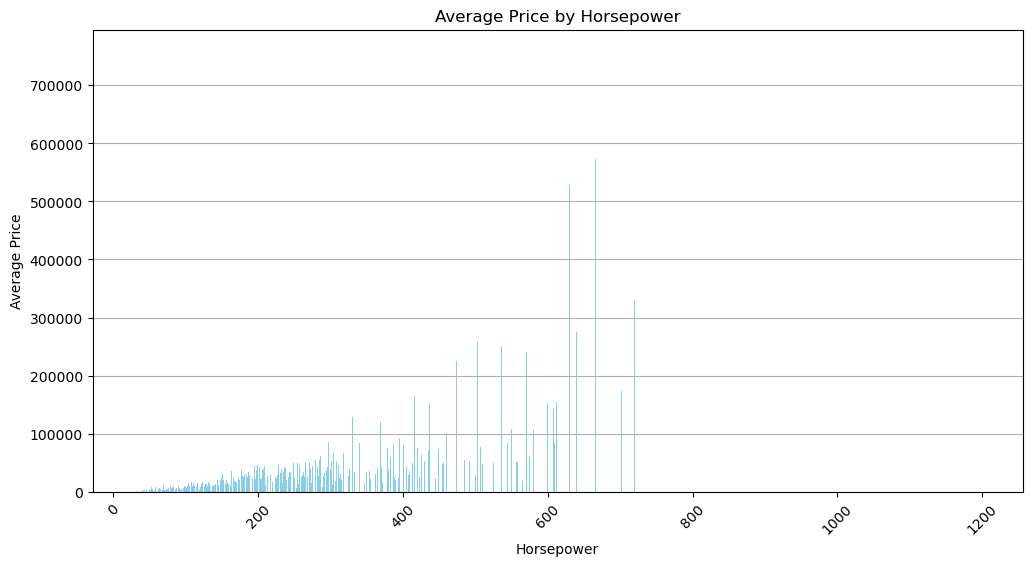

In [29]:
#calculate average price for each horsepower
avg_price_by_horsepower = df.groupby('car_engine_hp')['car_price'].mean().reset_index()

#create bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_price_by_horsepower['car_engine_hp'], avg_price_by_horsepower['car_price'], color='skyblue')
plt.title('Average Price by Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Larger horsepowers seem to correlate to higher prices.

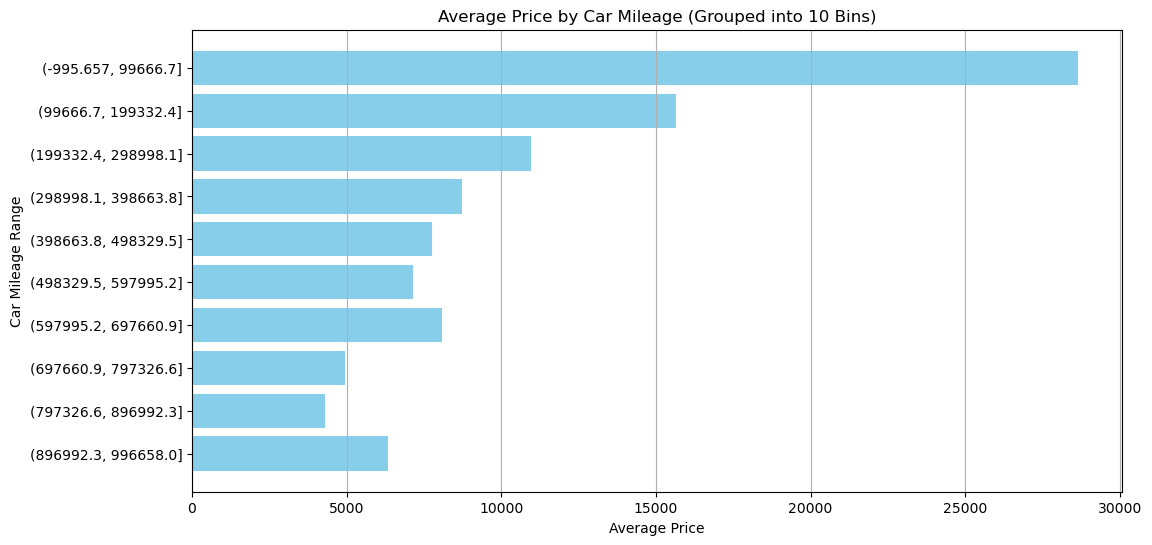

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# define the number of bins
num_bins = 10

mileage_bins = pd.cut(df['car_mileage'], bins=num_bins)

#gGroup car prices into these bins and calculate the average price for each bin
avg_price_by_mileage = df.groupby(mileage_bins)['car_price'].mean().reset_index()

# Convert interval values to strings
avg_price_by_mileage['car_mileage'] = avg_price_by_mileage['car_mileage'].astype(str)

# bar chart
plt.figure(figsize=(12, 6))
plt.barh(avg_price_by_mileage['car_mileage'], avg_price_by_mileage['car_price'], color='skyblue')
plt.title('Average Price by Car Mileage (Grouped into 10 Bins)')
plt.xlabel('Average Price')
plt.ylabel('Car Mileage Range')
plt.gca().invert_yaxis()  # Invert y-axis to have higher mileage values at the top
plt.grid(axis='x')  # Show grid lines on x-axis
plt.show()

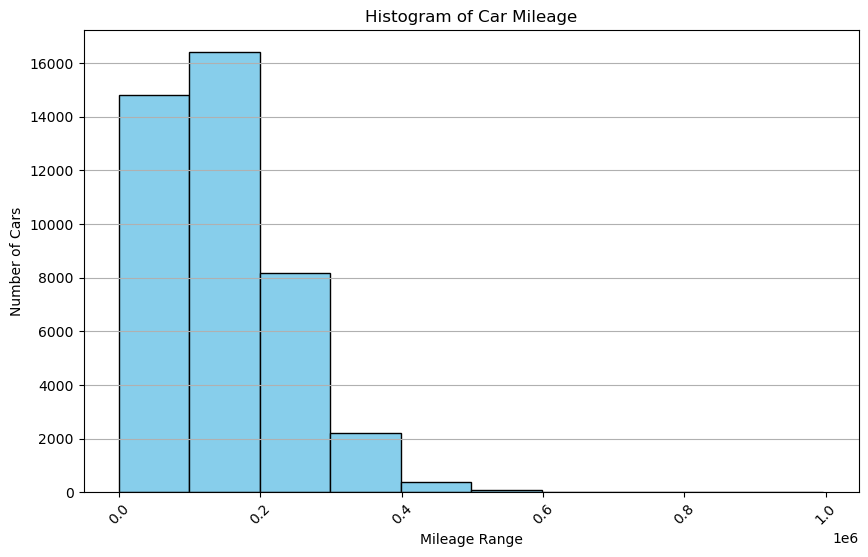

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['car_mileage'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Car Mileage')
plt.xlabel('Mileage Range')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Data Preperation

Here we will manipulate the data so that it is prepared for model training. This will include the steps of removing unnecessary rows, handling categorical data, and feature extraction.

First, we will apply one hot encoding for the car_fuel and car_transmission columns.

In [32]:
import pandas as pd

df = pd.read_csv("car_data.csv")
# Removing unnamed column, country, and city columns since they likely will not affect price
df = df.drop(columns=['Unnamed: 0', 'car_country', 'car_city'])

# Convert price column from rubles to USD (conversion rate: 0.011)
df['car_price'] = df['car_price'] * 0.011

# Apply one-hot encoding to the 'car_fuel', 'car_transmission', and 'car_drive' columns
df = pd.get_dummies(df, columns=['car_fuel', 'car_transmission', 'car_drive'], 
                    prefix=['fuel', 'transmission', 'drive'])

# Replace boolean values with 0 and 1
df = df.replace({False: 0, True: 1})

print(df.head())

       car_brand      car_model  car_price  car_mileage  car_engine_capacity  \
0           Ford      Focus         6050.0       300000                  1.8   
1  Mercedes-Benz  GLA-Class        20020.0        88000                  1.6   
2          Haval         F7        28600.0        19000                  1.5   
3         Toyota      Camry        46200.0        30000                  3.5   
4          OMODA         C5        23375.0        18824                  1.5   

   car_engine_hp  car_age  fuel_diesel  fuel_gasoline  fuel_hybrid  \
0            125       14            0              1            0   
1            156       10            0              1            0   
2            150        2            0              1            0   
3            249        2            0              1            0   
4            147        2            0              1            0   

   transmission_CVT  transmission_automatic  transmission_manual  \
0                 0           

To handle car make and model, we will implement target encoding. Other encoding methods like one hot encoding or binary encoding do not seem feasible because of the large number of unique brands and models. Target encoding involves replacing the categorical value with the mean target value for each respective category. This allows us to preserve the relationship between car brand/model and price without having to extrapolate the data.

To prevent data leakage, we will split the data into training and test sets before applying target encoding.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

# split the data into features and target
X = df.drop('car_price', axis=1)
y = df['car_price']

# split the data into training and test sets to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# applying target encoding to car_brand and car_model columns
target_columns = ['car_brand', 'car_model']
target_enc = TargetEncoder(cols=target_columns)

X_train[target_columns] = target_enc.fit_transform(X_train[target_columns], y_train)
X_test[target_columns] = target_enc.transform(X_test[target_columns])
# create seperate scaled versions of the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train.head()

,car_brand,car_model,car_mileage,car_engine_capacity,car_engine_hp,car_age,fuel_diesel,fuel_gasoline,fuel_hybrid,transmission_CVT,transmission_automatic,transmission_manual,transmission_robot,drive_4WD,drive_FWD,drive_RWD
41898,9939.626283,15105.591693,75000,2.7,128,14,0,1,0,0,0,1,0,1,0,0
29706,17682.605700,23703.944343,211160,2.0,200,12,0,1,0,0,1,0,0,1,0,0
18552,16204.644213,18013.552034,88662,2.5,194,5,0,1,0,0,1,0,0,0,1,0
40319,19450.898716,33357.813378,110000,3.5,273,11,0,1,0,0,1,0,0,1,0,0
22571,6721.433562,7847.528121,115000,1.6,87,11,0,1,0,0,0,1,0,0,1,0


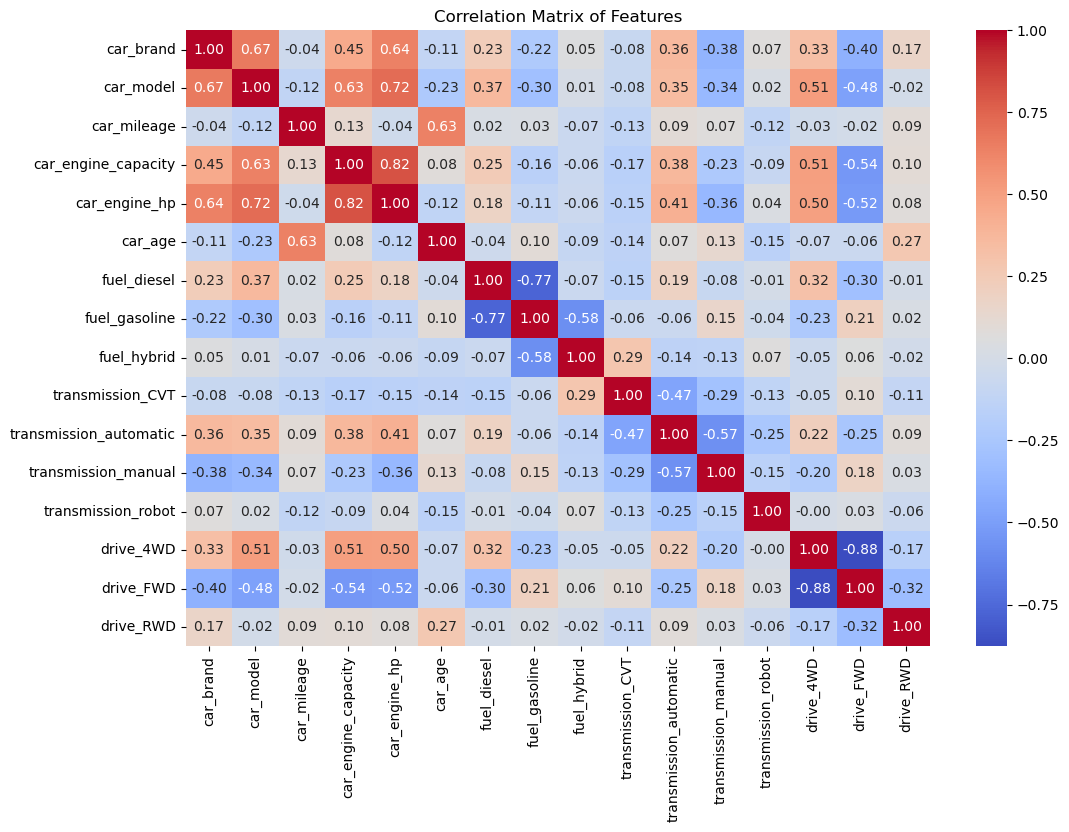

In [35]:
# correlation matrix of training data
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

This heatmap shows that most features are not heavily correlated with one another. Therefore, it is safe to move on with all the features without too much risk of multicollinearity.

### Explanation

1. Defining Features and Target: Here we define our target as price, and features as all other columns

2. Splitting Data: We split the data into training and test sets before applying target encoding to prevent data leakage and overfitting. We split 80% training 20% testing

3. Applyting Target Encoding: due to the high cardinality of car_brand and car_model, we apply target encoding

4. Normalization: Scaled versions are created for model training. This will be model dependent and some will use the scaled data, others will use the unscaled. For some models (i.e. tree-based models) benefit from using the unscaled data.


# Model Training

Below we will train the following ML models and compare their results:

1. Linear Regression
2. Decision Trees 
3. Random Forest
4. Gradient Boosting




In [40]:
import pandas as pd

df = pd.read_csv("car_data.csv")
# Removing unnamed column, country, and city columns since they likely will not affect price
df = df.drop(columns=['Unnamed: 0', 'car_country', 'car_city'])
# Convert price column from rubles to USD (conversion rate: 0.011)
df['car_price'] = df['car_price'] * 0.011
# Apply one-hot encoding to the 'car_fuel', 'car_transmission', and 'car_drive' columns
df = pd.get_dummies(df, columns=['car_fuel', 'car_transmission', 'car_drive'], 
                    prefix=['fuel', 'transmission', 'drive'])
# Replace boolean values with 0 and 1
df = df.replace({False: 0, True: 1})

print(df.head())

       car_brand      car_model  car_price  car_mileage  car_engine_capacity  \
0           Ford      Focus         6050.0       300000                  1.8   
1  Mercedes-Benz  GLA-Class        20020.0        88000                  1.6   
2          Haval         F7        28600.0        19000                  1.5   
3         Toyota      Camry        46200.0        30000                  3.5   
4          OMODA         C5        23375.0        18824                  1.5   

   car_engine_hp  car_age  fuel_diesel  fuel_gasoline  fuel_hybrid  \
0            125       14            0              1            0   
1            156       10            0              1            0   
2            150        2            0              1            0   
3            249        2            0              1            0   
4            147        2            0              1            0   

   transmission_CVT  transmission_automatic  transmission_manual  \
0                 0           

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

# Split the data into features and target
X = df.drop('car_price', axis=1)
y = df['car_price']

# Split the data into training and test sets to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying target encoding to car_brand and car_model columns
target_columns = ['car_brand', 'car_model']
target_enc = TargetEncoder(cols=target_columns)

X_train[target_columns] = target_enc.fit_transform(X_train[target_columns], y_train)
X_test[target_columns] = target_enc.transform(X_test[target_columns])

X_train.head()

,car_brand,car_model,car_mileage,car_engine_capacity,car_engine_hp,car_age,fuel_diesel,fuel_gasoline,fuel_hybrid,transmission_CVT,transmission_automatic,transmission_manual,transmission_robot,drive_4WD,drive_FWD,drive_RWD
41898,9939.626283,15105.591693,75000,2.7,128,14,0,1,0,0,0,1,0,1,0,0
29706,17682.605700,23703.944343,211160,2.0,200,12,0,1,0,0,1,0,0,1,0,0
18552,16204.644213,18013.552034,88662,2.5,194,5,0,1,0,0,1,0,0,0,1,0
40319,19450.898716,33357.813378,110000,3.5,273,11,0,1,0,0,1,0,0,1,0,0
22571,6721.433562,7847.528121,115000,1.6,87,11,0,1,0,0,0,1,0,0,1,0


In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# function to calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = calculate_mape(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression MAE:", mae_lr)
print("Linear Regression MAPE:", mape_lr)
print()

# decision Tree
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mape_tree = calculate_mape(y_test, y_pred_tree)

print('Decision Tree MSE:', mse_tree)
print('Decision Tree RSME:', rmse_tree)
print('Decision Tree MAE:', mae_tree)
print('Decision Tree MAPE:', mape_tree)
print()

# random Forest
model_forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_forest.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mape_forest = calculate_mape(y_test, y_pred_forest)

print("Random Forest MSE:", mse_forest)
print("Random Forest RMSE:", rmse_forest)
print("Random Forest MAE:", mae_forest)
print("Random Forest MAPE:", mape_forest)
print()

# gradient Boosting
parameters = {
    'n_estimators': [200],
    'max_depth': [3, 4],
    'learning_rate': [0.1, 0.2]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), parameters, cv=5)
gb_grid.fit(X_train, y_train)

# get best GB model from grid search
model_gb = gb_grid.best_estimator_
y_pred_gb = model_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mape_gb = calculate_mape(y_test, y_pred_gb)

print("Gradient Boost MSE:", mse_gb)
print("Gradient Boost RMSE:", rmse_gb)
print('Gradient Boost MAE:', mae_gb)
print('Gradient Boost MAPE:', mape_gb)

Linear Regression MSE: 134454153.62289524
Linear Regression RMSE: 11595.436758608761
Linear Regression MAE: 6002.127483192066
Linear Regression MAPE: 0.6411544179601025

Decision Tree MSE: 68885951.91219285
Decision Tree RSME: 8299.756135706208
Decision Tree MAE: 3052.6572739961985
Decision Tree MAPE: 0.22171239262407613

Random Forest MSE: 39245887.139780544
Random Forest RMSE: 6264.653792491692
Random Forest MAE: 2321.6441021754017
Random Forest MAPE: 0.17468356247271066

Gradient Boost MSE: 36020114.505509436
Gradient Boost RMSE: 6001.675974718181
Gradient Boost MAE: 2436.118994138688
Gradient Boost MAPE: 0.18629634353267172


# Results: Summary and Visualizations

Please use figures, tables, or videos to communicate the results with the audience.


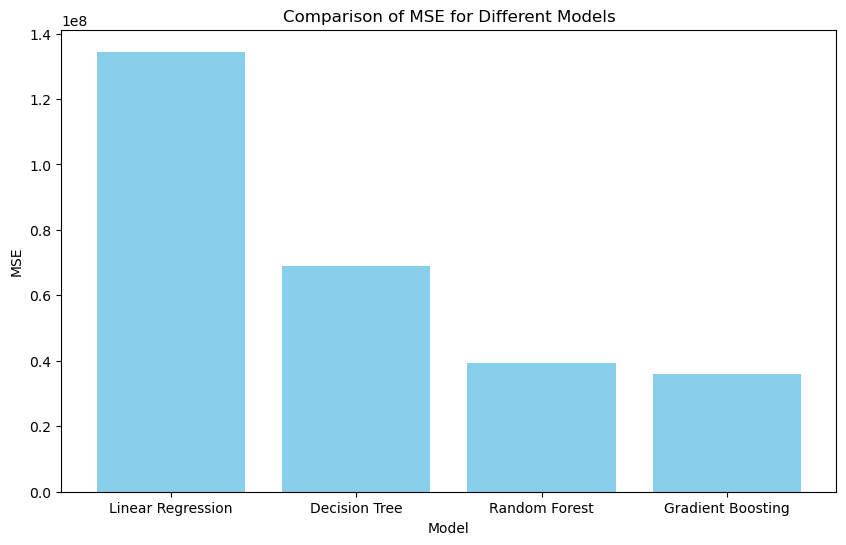

In [44]:
import matplotlib.pyplot as plt

# MSE values for each model
mse_values = [mse_lr, mse_tree, mse_forest, mse_gb]

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Comparison of MSE for Different Models')
plt.show()

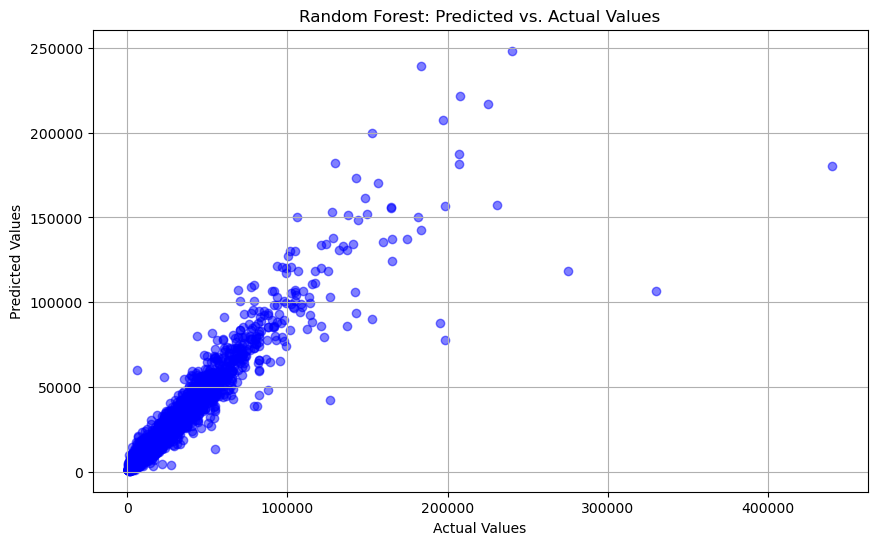

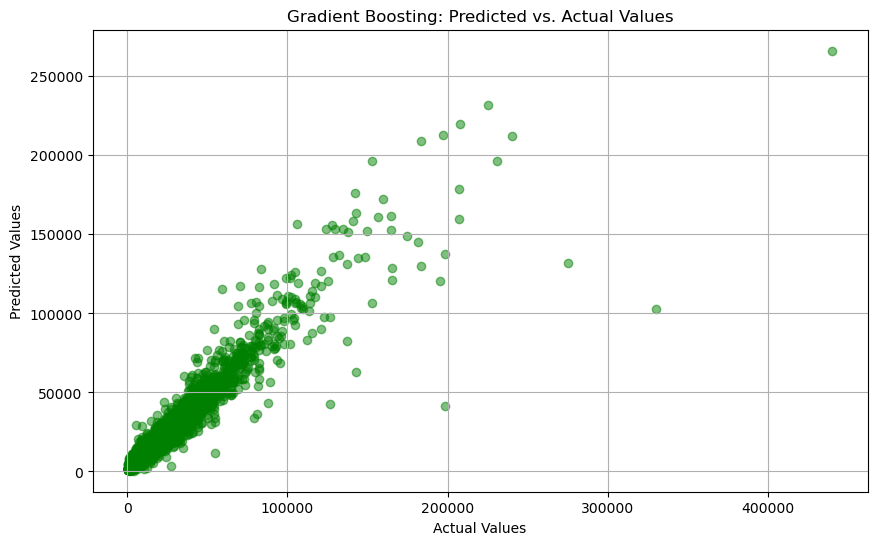

In [45]:
import matplotlib.pyplot as plt

# scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, color='blue', alpha=0.5)
plt.title('Random Forest: Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# scatter plot for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='green', alpha=0.5)
plt.title('Gradient Boosting: Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

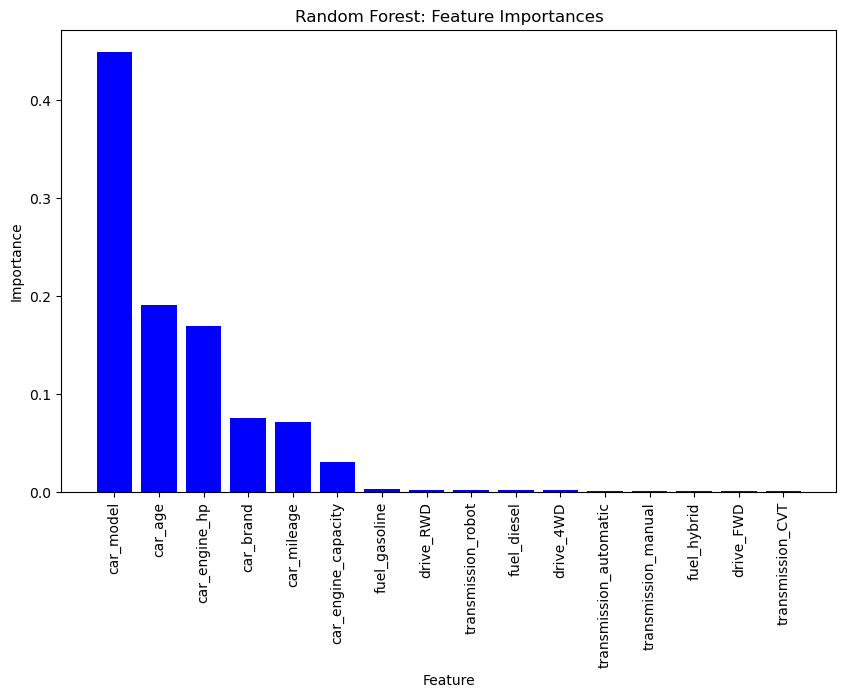

In [46]:
# feature importances from Random Forest model
importances_rf = model_forest.feature_importances_

# sort feature importances in descending order
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Random Forest: Feature Importances')
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], color='blue', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_rf], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

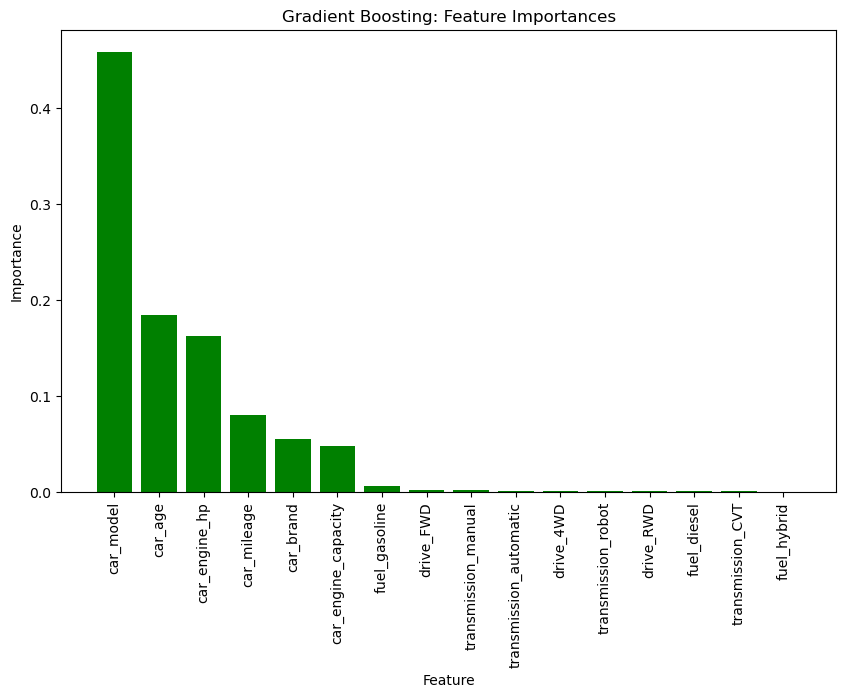

In [47]:
# feature importances from Gradient Boosting model
importances_gb = model_gb.feature_importances_

# sort feature importances in descending order
indices_gb = np.argsort(importances_gb)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Gradient Boosting: Feature Importances')
plt.bar(range(X_train.shape[1]), importances_gb[indices_gb], color='green', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_gb], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()